In [1]:
from common import colors, sbarlw, insetlw

In [2]:
import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/home/efharkin/projects/raphegif/raphegif


In [3]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import seaborn as sns
import numpy as np

from ezephys import pltools
from ezephys.rectools import ABFLoader, Recording
from grr.CurveFit import extract_gating_data, fit_gating_curve
from grr.Tools import dashedBorder, raiseExpectedGot, assertAllAlmostSame
from grr.cell_class import max_normalize_channel

In [4]:
DATA_PATH = os.path.join('data', 'processed', 'gating')
IMG_PATH = None#os.path.join('figs', 'ims', 'writeup', 'fig1')
NOTEBOOK_PATH = os.path.join('figs', 'scripts')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

In [5]:
# Fit curves.
rec_index = pd.read_csv(
    os.path.join(os.getenv('DATA_PATH'), 'raw', '5HT', 'gating', 'index.csv')
)

l = ABFLoader()
ACCESS_RESISTANCE_CUTOFF = 30.0
INCLUSION_QUERY = (
    'access_resistance_megaohm <= @ACCESS_RESISTANCE_CUTOFF and include'
)
gating = l.load(
    [
        os.path.join(os.getenv('DATA_PATH'), 'raw', '5HT', 'gating', fname)
        for fname in rec_index.query(INCLUSION_QUERY)['filename']
    ]
)

pdata = extract_gating_data(
    gating,
    (0, 2000),
    (3500, 4000),
    (26140, 26160),
    (56130, 56160),
    (55000, 56000),
    'time_step',
)

params = {}
fittedpts = {}
initial_param_guess = {
    'activation_peak': [12, 1, -30],
    'inactivation_peak': [12, -1, -60],
    'steady_state': [12, 1, -25],
}

for k, v in pdata.iteritems():
    p, f = fit_gating_curve(v, initial_param_guess[k])
    params[k] = p
    fittedpts[k] = f

del k, v, p, f, initial_param_guess

params = pd.DataFrame(
    {
        'm': params['activation_peak'],
        'h': params['inactivation_peak'],
        'n': params['steady_state'],
    },
    index=('A', 'k', 'V_half'),
)

with open(
    os.path.join(
        os.getenv('DATA_PATH'),
        'processed',
        '5HT',
        'gating_params_room_temp.csv',
    ),
    'w',
) as f:
    included_recs = rec_index.query(INCLUSION_QUERY)
    metadata = (
        '# num_cells={}\n'
        '# access_resistance_cutoff_megaohm={}\n'
        '# access_resistance_mean_megaohm={:.2f}\n'
        '# access_resistance_std_megaohm={:.2f}\n'
        '# m="I_A activation gate"\n'
        '# h="I_A inactivation gate"\n'
        '# n="Non-inactivating current activation gate"\n'
        '# A="Sigmoid scaling factor"\n'
        '# k="Sigmoid slope"\n'
        '# V_half="Sigmoid location (half-activation voltage in mV)"\n'
    ).format(
        included_recs.shape[0],
        ACCESS_RESISTANCE_CUTOFF,
        included_recs['access_resistance_megaohm'].mean(),
        included_recs['access_resistance_megaohm'].std(),
    )
    f.write(metadata)
    params.to_csv(f)
    f.close()

print(metadata)
params

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


# num_cells=13
# access_resistance_cutoff_megaohm=30.0
# access_resistance_mean_megaohm=14.71
# access_resistance_std_megaohm=6.19
# m="I_A activation gate"
# h="I_A inactivation gate"
# n="Non-inactivating current activation gate"
# A="Sigmoid scaling factor"
# k="Sigmoid slope"
# V_half="Sigmoid location (half-activation voltage in mV)"



,h,m,n
A,1.025027,1.612950,1.547850
k,-0.164914,0.098484,0.216088
V_half,-59.193314,-23.675045,-24.303698


Load sample trace.

In [6]:
TRACE_PATH = './data/raw/5HT/gating/'

beautiful_gating_1 = l.load(
    [
        os.path.join(os.getenv('DATA_PATH'), 'raw', '5HT', 'gating', fname)
        for fname in ['18619018.abf', '18619019.abf', '18619020.abf']
    ]
)
beautiful_gating_1 = Recording(
    np.array(beautiful_gating_1).mean(axis=0), beautiful_gating_1[0].dt
)

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


# Trace plot

/home/efharkin/.miniconda3/envs/raphegif/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


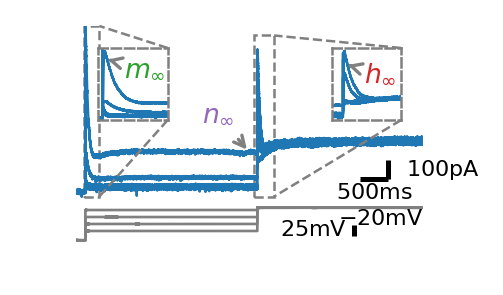

In [7]:
spec_trace = gs.GridSpec(2, 1, height_ratios=[1, 0.2], hspace=0, left=0.05, bottom=0.05, right=0.9, top=0.95)

plt.figure(figsize=(1.7, 1))

act_ax = plt.subplot(spec_trace[0, :])
Kslow_xlim = (2450, 8500)
plt.plot(
    beautiful_gating_1.time_supp,
    beautiful_gating_1[0, :, -2::-3], '-',
    linewidth = 0.7, color=colors['ser']
)
plt.annotate(
    r'$n_\infty$', (5500, 170),
    xytext = (-10, 10), textcoords = 'offset points', ha = 'center',
    arrowprops = {'arrowstyle': '->'},
    color=colors['n']
)
plt.xlim(Kslow_xlim)
plt.ylim(-100, 850)
pltools.add_scalebar(
    'ms', 'pA', anchor = (0.9, 0.15),
    x_label_space = -0.02, y_label_space=-0.05, y_size = 100, x_size = 500, bar_space = 0,
    linewidth=sbarlw
)

act_ins = inset_axes(act_ax, '20%', '40%', loc = 'upper left', borderpad = 1.1)
act_ins.plot(
    beautiful_gating_1.time_supp,
    beautiful_gating_1[0, :, -2::-3], '-',
    linewidth = 0.7, color=colors['ser']
)
plt.annotate(
    r'$m_\infty$', (2625, 705),
    xytext = (5, -5), textcoords = 'offset points',
    arrowprops = {'arrowstyle': '->'},
    color=colors['m']
)
dashedBorder(act_ins, lw=insetlw)
pltools.hide_ticks()
plt.xlim(2590, 2850)
plt.ylim(-50, 850)
mark_inset(act_ax, act_ins, loc1 = 1, loc2 = 4, ls = '--', color = 'gray', lw = insetlw)

inact_ins = inset_axes(act_ax, '20%', '40%', loc = 'upper right', borderpad = 1.1)
inact_ins.plot(
    beautiful_gating_1.time_supp,
    beautiful_gating_1[0, :, -3::-3], '-',
    linewidth = 0.7, color=colors['ser']
)
plt.annotate(
    r'$h_\infty$', (5630, 600),
    xytext = (5, -5), textcoords = 'offset points',
    arrowprops = {'arrowstyle': '->'},
    color=colors['h']
)
dashedBorder(inact_ins, lw=insetlw)
#pltools.add_scalebar(y_units = 'pA', x_units = 'ms', remove_frame = False, ax = inact_ins)
pltools.hide_ticks()
plt.xlim(5550, 5900)
plt.ylim(-50, 800)
mark_inset(act_ax, inact_ins, loc1 = 1, loc2 = 4, ls = '--', color = 'gray', lw = insetlw)

plt.subplot(spec_trace[1, :])
plt.plot(
    beautiful_gating_1.time_supp,
    beautiful_gating_1[1, :, -2::-3], '-',
    color = 'gray'
)
plt.xlim(Kslow_xlim)
plt.text(Kslow_xlim[1], -22, '$-20$mV', ha = 'right', va = 'top', size = 'small')
pltools.add_scalebar(y_units = 'mV', omit_x = True, anchor = (0.8, 0.1), linewidth=sbarlw)

plt.tight_layout()

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'ser_gating_experiment.png'))
    plt.savefig(os.path.join(IMG_PATH, 'ser_gating_experiment.svg'))

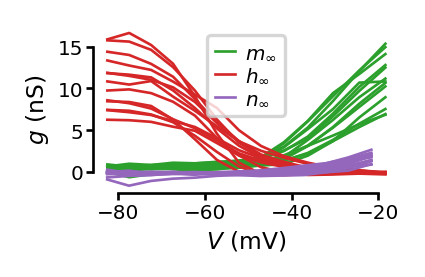

In [8]:
plt.figure(figsize=(1.7, 1))

plt.subplot(111)
plt.plot(
    pdata['activation_peak'][1, :, 0],
    pdata['activation_peak'][0, :, 0],
    color=colors['m'],
    label=r'$m_\infty$',
)
plt.plot(
    pdata['activation_peak'][1, :, 1:],
    pdata['activation_peak'][0, :, 1:],
    color=colors['m'],
)

plt.plot(
    pdata['inactivation_peak'][1, :, 0],
    pdata['inactivation_peak'][0, :, 0],
    color=colors['h'],
    label=r'$h_\infty$',
)
plt.plot(
    pdata['inactivation_peak'][1, :, 1:],
    pdata['inactivation_peak'][0, :, 1:],
    color=colors['h'],
)

plt.plot(
    pdata['steady_state'][1, :, 0],
    pdata['steady_state'][0, :, 0],
    color=colors['n'],
    label=r'$n_\infty$',
)
plt.plot(
    pdata['steady_state'][1, :, 1:],
    pdata['steady_state'][0, :, 1:],
    color=colors['n'],
)

plt.yticks([0, 5, 10, 15])
plt.ylabel('$g$ (nS)')
plt.xlabel('$V$ (mV)')

plt.legend(loc='upper center')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.2, bottom=0.25, top=0.95, right=0.95)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'ser_unnormalized_gating_curves.png'))
    plt.savefig(os.path.join(IMG_PATH, 'ser_unnormalized_gating_curves.svg'))

# Gating plot

In [9]:
def get_plot_coordinates_with_error(pdata, error_type='sem'):
    if error_type not in ['std', 'sem']:
        raiseExpectedGot('`std` or `sem`', 'argument `error_type`', error_type)

    # Ensure voltages are same for all observations.
    for i in range(pdata.shape[1]):
        assertAllAlmostSame(
            pdata[1, i, :]
        )  # Voltage channel should be [1, :, :]

    x = pdata[1, ...].mean(axis=1)
    y_mean = max_normalize_channel(pdata[0, ...]).mean(axis=1)
    y_std = max_normalize_channel(pdata[0, ...]).std(axis=1)
    if error_type == 'sem':
        y_err = y_std / np.sqrt(pdata.shape[2])
    elif error_type == 'std':
        y_err = y_std
    else:
        raise RuntimeError('Unexpectedly reached end of switch.')

    return {'x': x, 'y': y_mean, 'yerr': y_err}

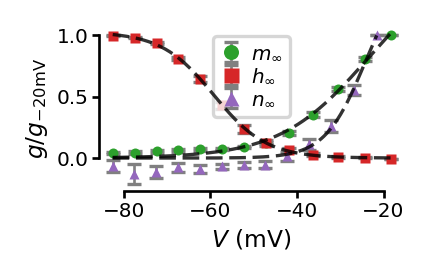

In [10]:
plt_params = {'ls': 'none', 'capsize': 2, 'ecolor': 'gray', 'markersize': 3, 'markeredgecolor': 'none'}

plt.figure(figsize=(1.7, 1))

plt.errorbar(
    marker='o',
    label='$m_\infty$',
    color=colors['m'],
    **dict(
        plt_params, **get_plot_coordinates_with_error(pdata['activation_peak'])
    )
)
plt.errorbar(
    marker='s',
    label='$h_\infty$',
    color=colors['h'],
    **dict(
        plt_params,
        **get_plot_coordinates_with_error(pdata['inactivation_peak'])
    )
)
plt.errorbar(
    marker='^',
    label='$n_\infty$',
    color=colors['n'],
    **dict(
        plt_params, **get_plot_coordinates_with_error(pdata['steady_state'])
    )
)
for key in fittedpts:
    plt.plot(
        fittedpts[key][1, :], 
        fittedpts[key][0, :], 
        '--', 
        color=colors['fit'],
        alpha=0.8,
        lw=1, 
        dashes=(5, 2), 
        zorder=100
    )
plt.yticks([0, 0.5, 1])
plt.xlabel('$V$ (mV)')
plt.ylabel(r'$g/g_{-20 \mathrm{mV}}$')
plt.legend(loc='upper center')

sns.despine(trim=True)

plt.subplots_adjust(left=0.2, bottom=0.26, top=0.95, right=0.95)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'ser_gating_curves.png'))
    plt.savefig(os.path.join(IMG_PATH, 'ser_gating_curves.svg'))